In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/DiverseTalent_Applications.csv")
df

,Age,Gender,Region,Educational_Background,Technical_Skills,Experience_Level,Preferred_Job_Role,Salary_Expectation,Application_Source,Application_Status,Interview_Score,Certifications_Count
0,32.0,Non-Binary,Asia,Mathematics,"Excel, R",1.0,NaN,65359.83,Company Website,NaN,44.0,5.0
1,26.0,Non-Binary,Asia,Mathematics,"R, Excel",0.0,Data Engineer,68220.69,Referral,NaN,84.0,4.0
2,35.0,NaN,Europe,Mathematics,"Python, Tableau",3.0,Data Architect,78471.71,LinkedIn,NaN,84.0,5.0
3,28.0,Non-Binary,Europe,Mathematics,"Excel, R",3.0,Data Analyst,55964.86,Campus Recruitment,NaN,62.0,0.0
4,32.0,Non-Binary,Europe,Engineering,"Python, SQL",1.0,Data Engineer,75208.78,Company Website,NaN,83.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,30.0,Male,Oceania,Mathematics,"Python, Tableau",1.0,Data Analyst,51351.38,Campus Recruitment,NaN,68.0,5.0
10996,28.0,Male,NaN,Computer Science,"Python, Tableau",10.0,ML Engineer,85059.63,Company Website,Rejected,79.0,2.0
10997,22.0,Non-Binary,South America,NaN,"R, Excel",1.0,Data Analyst,51020.33,Referral,Rejected,83.0,3.0
10998,26.0,Male,South America,Mathematics,"R, Excel",3.0,Data Engineer,49287.02,Referral,Rejected,70.0,4.0


# **Section 1: Data Understanding**

In [5]:
# Q1: What are the first 5 rows of the dataset?
df.head()

,Age,Gender,Region,Educational_Background,Technical_Skills,Experience_Level,Preferred_Job_Role,Salary_Expectation,Application_Source,Application_Status,Interview_Score,Certifications_Count
0,32.0,Non-Binary,Asia,Mathematics,"Excel, R",1.0,NaN,65359.83,Company Website,NaN,44.0,5.0
1,26.0,Non-Binary,Asia,Mathematics,"R, Excel",0.0,Data Engineer,68220.69,Referral,NaN,84.0,4.0
2,35.0,NaN,Europe,Mathematics,"Python, Tableau",3.0,Data Architect,78471.71,LinkedIn,NaN,84.0,5.0
3,28.0,Non-Binary,Europe,Mathematics,"Excel, R",3.0,Data Analyst,55964.86,Campus Recruitment,NaN,62.0,0.0
4,32.0,Non-Binary,Europe,Engineering,"Python, SQL",1.0,Data Engineer,75208.78,Company Website,NaN,83.0,1.0


In [6]:
# Q2: What is the shape of the dataset?
df.shape

(11000, 12)

In [7]:
# Q3: What are the column names of the dataset?
df.columns

Index(['Age', 'Gender', 'Region', 'Educational_Background', 'Technical_Skills',
       'Experience_Level', 'Preferred_Job_Role', 'Salary_Expectation',
       'Application_Source', 'Application_Status', 'Interview_Score',
       'Certifications_Count'],
      dtype='object')

In [8]:
# Q4: What is the data type of each column?
df.dtypes

,0
Age,float64
Gender,object
Region,object
Educational_Background,object
Technical_Skills,object
Experience_Level,float64
Preferred_Job_Role,object
Salary_Expectation,float64
Application_Source,object
Application_Status,object


In [9]:
numerical_columns = df.select_dtypes(include = ['int64', 'float64']).columns
categorical_columns = df.select_dtypes(include = ['object']).columns

In [10]:
print("numerical_columns : ", numerical_columns)
print("categorical_columns : ", categorical_columns)

numerical_columns :  Index(['Age', 'Experience_Level', 'Salary_Expectation', 'Interview_Score',
       'Certifications_Count'],
      dtype='object')
categorical_columns :  Index(['Gender', 'Region', 'Educational_Background', 'Technical_Skills',
       'Preferred_Job_Role', 'Application_Source', 'Application_Status'],
      dtype='object')


In [11]:
# Q5: Are there any missing (null) values in the dataset?
df.isnull().sum()

,0
Age,1141
Gender,2199
Region,1589
Educational_Background,1600
Technical_Skills,1912
Experience_Level,1406
Preferred_Job_Role,1565
Salary_Expectation,0
Application_Source,1775
Application_Status,2691


In [12]:
# information of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     9859 non-null   float64
 1   Gender                  8801 non-null   object 
 2   Region                  9411 non-null   object 
 3   Educational_Background  9400 non-null   object 
 4   Technical_Skills        9088 non-null   object 
 5   Experience_Level        9594 non-null   float64
 6   Preferred_Job_Role      9435 non-null   object 
 7   Salary_Expectation      11000 non-null  float64
 8   Application_Source      9225 non-null   object 
 9   Application_Status      8309 non-null   object 
 10  Interview_Score         10421 non-null  float64
 11  Certifications_Count    9440 non-null   float64
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


In [13]:
# Q6: What is the percentage of missing values for each column?
percentage_missing = df.isnull().sum() * 100 / len(df)
percentage_missing

,0
Age,10.372727
Gender,19.990909
Region,14.445455
Educational_Background,14.545455
Technical_Skills,17.381818
Experience_Level,12.781818
Preferred_Job_Role,14.227273
Salary_Expectation,0.000000
Application_Source,16.136364
Application_Status,24.463636


In [15]:
# Q7: What is the summary of the dataset?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     9859 non-null   float64
 1   Gender                  8801 non-null   object 
 2   Region                  9411 non-null   object 
 3   Educational_Background  9400 non-null   object 
 4   Technical_Skills        9088 non-null   object 
 5   Experience_Level        9594 non-null   float64
 6   Preferred_Job_Role      9435 non-null   object 
 7   Salary_Expectation      11000 non-null  float64
 8   Application_Source      9225 non-null   object 
 9   Application_Status      8309 non-null   object 
 10  Interview_Score         10421 non-null  float64
 11  Certifications_Count    9440 non-null   float64
dtypes: float64(5), object(7)
memory usage: 1.0+ MB


In [16]:
# Q8: What are the basic statistics of numerical columns?
df.describe()

,Age,Experience_Level,Salary_Expectation,Interview_Score,Certifications_Count
count,9859.000000,9594.000000,11000.000000,10421.000000,9440.000000
mean,28.535450,4.012612,70130.432006,70.043182,2.517797
std,6.064594,3.293133,15402.555208,15.925488,1.715580
min,20.000000,0.000000,14022.030000,3.000000,0.000000
25%,24.000000,1.000000,59718.820000,53.000000,1.000000
50%,28.000000,3.000000,70088.890000,70.000000,3.000000
75%,32.000000,7.000000,80409.777500,83.000000,4.000000
max,40.000000,10.000000,300000.000000,99.000000,12.000000


In [17]:
# Q9: What is the distribution of the 'Application_Status' column?
df['Application_Status'].value_counts()

,count
Application_Status,
Accepted,2815
Rejected,2758
Pending,2736


In [19]:
# Q10: What are the unique values in the 'Preferred_Job_Role' column?
df['Preferred_Job_Role'].unique()

array([nan, 'Data Engineer', 'Data Architect', 'Data Analyst',
       'Data Scientist', 'BI Analyst', 'ML Engineer'], dtype=object)

In [25]:
df['Preferred_Job_Role'].value_counts()

,count
Preferred_Job_Role,
Data Architect,1610
BI Analyst,1610
Data Scientist,1587
ML Engineer,1587
Data Analyst,1562
Data Engineer,1479


# **Section 2: Data Visualization and Analysis:**

In [22]:
# Q11: How many duplicate rows are present in the dataset?
df.duplicated().sum()

1000

In [26]:
# Q12: Display the duplicate rows, if any.
df[df.duplicated()]

,Age,Gender,Region,Educational_Background,Technical_Skills,Experience_Level,Preferred_Job_Role,Salary_Expectation,Application_Source,Application_Status,Interview_Score,Certifications_Count
10000,26.0,Non-Binary,North America,Statistics,"R, Excel",10.0,ML Engineer,80168.84,LinkedIn,Accepted,70.0,2.0
10001,22.0,Non-Binary,Africa,Statistics,"Python, SQL",3.0,BI Analyst,54637.80,Job Portal,NaN,70.0,NaN
10002,28.0,Prefer Not to Say,Asia,NaN,"Excel, R",5.0,Data Architect,89336.62,Referral,NaN,68.0,5.0
10003,35.0,Male,Oceania,Business,"Python, SQL",7.0,BI Analyst,86097.88,NaN,Rejected,70.0,5.0
10004,24.0,Prefer Not to Say,Africa,Business,"Python, Tableau",2.0,Data Scientist,96179.25,Campus Recruitment,Accepted,83.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
10995,30.0,Male,Oceania,Mathematics,"Python, Tableau",1.0,Data Analyst,51351.38,Campus Recruitment,NaN,68.0,5.0
10996,28.0,Male,NaN,Computer Science,"Python, Tableau",10.0,ML Engineer,85059.63,Company Website,Rejected,79.0,2.0
10997,22.0,Non-Binary,South America,NaN,"R, Excel",1.0,Data Analyst,51020.33,Referral,Rejected,83.0,3.0
10998,26.0,Male,South America,Mathematics,"R, Excel",3.0,Data Engineer,49287.02,Referral,Rejected,70.0,4.0


In [27]:
# Q13: What is the distribution of the 'Gender' column?
df['Gender'].value_counts()

,count
Gender,
Female,2284
Male,2204
Prefer Not to Say,2199
Non-Binary,2114


In [28]:
# Q14: What are the unique values in the 'Educational_Background' column?
df['Educational_Background'].unique()

array(['Mathematics', 'Engineering', 'Business', 'Computer Science',
       'Statistics', nan, 'Arts'], dtype=object)

In [29]:
df['Educational_Background'].value_counts()

,count
Educational_Background,
Mathematics,1672
Arts,1615
Computer Science,1545
Statistics,1530
Engineering,1523
Business,1515


In [30]:
df.columns

Index(['Age', 'Gender', 'Region', 'Educational_Background', 'Technical_Skills',
       'Experience_Level', 'Preferred_Job_Role', 'Salary_Expectation',
       'Application_Source', 'Application_Status', 'Interview_Score',
       'Certifications_Count'],
      dtype='object')

<Axes: xlabel='Experience_Level', ylabel='count'>

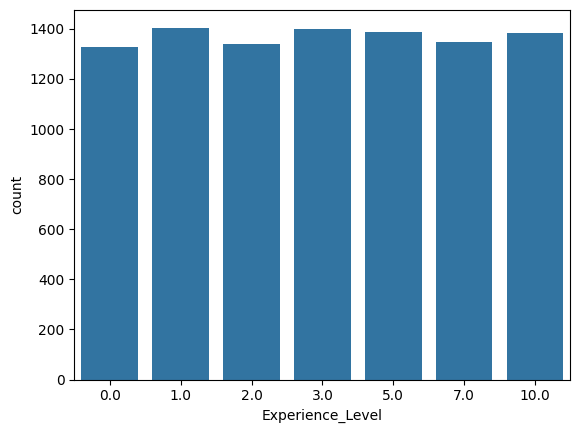

In [31]:
# Q15: Visualize the distribution of 'Experience_Level'. (Countplot)
sns.countplot(x = 'Experience_Level', data = df)

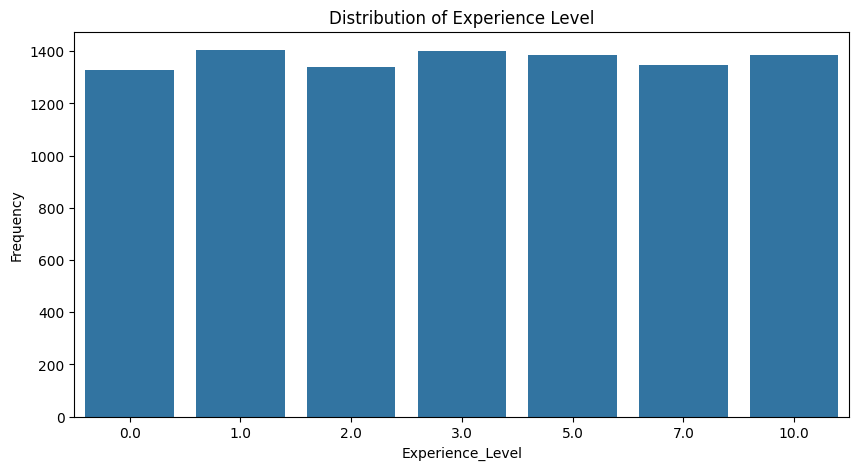

In [37]:
plt.figure(figsize = (10, 5))
sns.countplot(x = 'Experience_Level', data = df)
plt.title("Distribution of Experience Level")
plt.xlabel("Experience_Level")
plt.ylabel("Frequency")
plt.show()

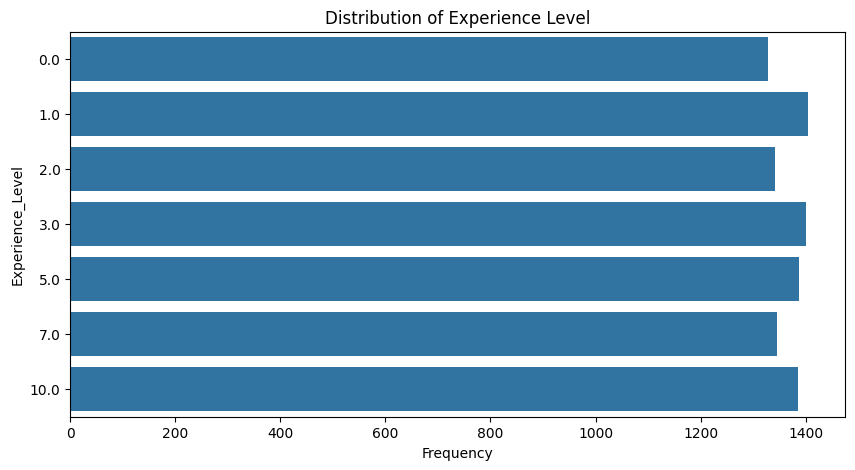

In [39]:
plt.figure(figsize = (10, 5))
sns.countplot(y = 'Experience_Level', data = df)
plt.title("Distribution of Experience Level")
plt.ylabel("Experience_Level")
plt.xlabel("Frequency")
plt.show()

<Axes: xlabel='Application_Status', ylabel='count'>

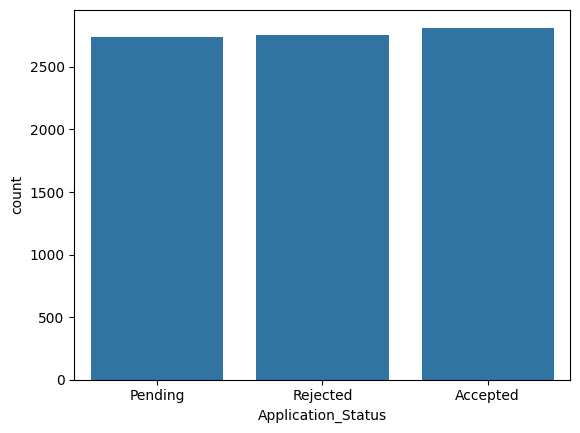

In [40]:
# Q16: Visualize the distribution of 'Application_Status'. (Countplot)
sns.countplot(x= 'Application_Status', data = df)

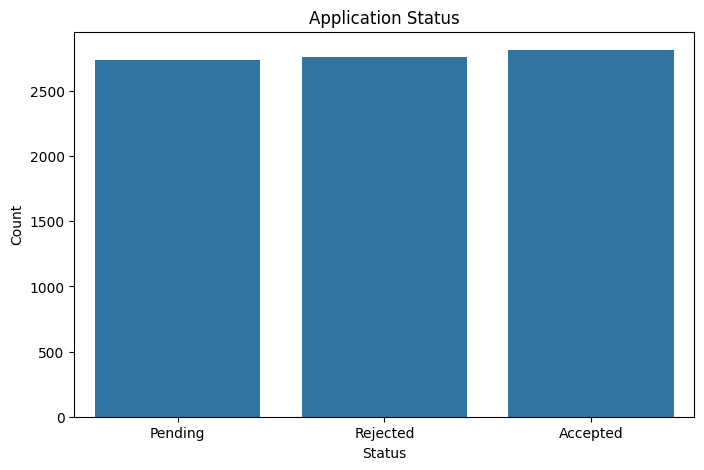

In [45]:
plt.figure(figsize=(8,5))
sns.countplot(x='Application_Status',data=df)
plt.title('Application Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

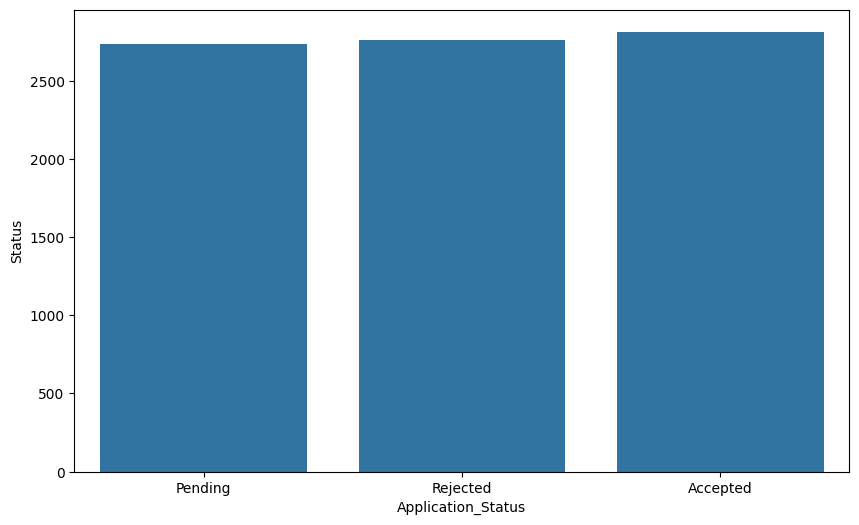

In [47]:
plt.figure(figsize = (10,6))
sns.countplot(x = 'Application_Status', data = df)
plt.xlabel('Application_Status')
plt.ylabel('Status')
plt.show()

In [48]:
df.columns

Index(['Age', 'Gender', 'Region', 'Educational_Background', 'Technical_Skills',
       'Experience_Level', 'Preferred_Job_Role', 'Salary_Expectation',
       'Application_Source', 'Application_Status', 'Interview_Score',
       'Certifications_Count'],
      dtype='object')

In [50]:
# Q17: Find the correlation between numerical columns.
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                           Age  Experience_Level  Salary_Expectation  \
Age                   1.000000          0.001425            0.007333   
Experience_Level      0.001425          1.000000           -0.002636   
Salary_Expectation    0.007333         -0.002636            1.000000   
Interview_Score      -0.005685         -0.009163           -0.016649   
Certifications_Count  0.009952          0.003525            0.015428   

                      Interview_Score  Certifications_Count  
Age                         -0.005685              0.009952  
Experience_Level            -0.009163              0.003525  
Salary_Expectation          -0.016649              0.015428  
Interview_Score              1.000000             -0.010684  
Certifications_Count        -0.010684              1.000000  


In [52]:
correlattion_matrix = df[numerical_columns].corr()
print(correlattion_matrix)

                           Age  Experience_Level  Salary_Expectation  \
Age                   1.000000          0.001425            0.007333   
Experience_Level      0.001425          1.000000           -0.002636   
Salary_Expectation    0.007333         -0.002636            1.000000   
Interview_Score      -0.005685         -0.009163           -0.016649   
Certifications_Count  0.009952          0.003525            0.015428   

                      Interview_Score  Certifications_Count  
Age                         -0.005685              0.009952  
Experience_Level            -0.009163              0.003525  
Salary_Expectation          -0.016649              0.015428  
Interview_Score              1.000000             -0.010684  
Certifications_Count        -0.010684              1.000000  


<Axes: >

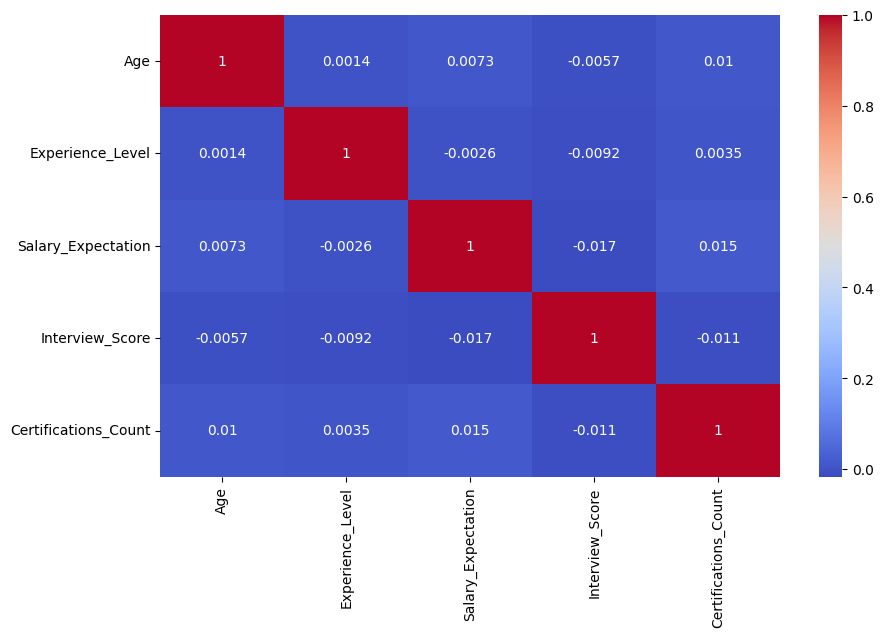

In [56]:
# Q18: Visualize the correlation matrix using a heatmap.
plt.figure(figsize = (10, 6))
sns.heatmap(correlattion_matrix, annot = True, cmap = 'coolwarm')

Text(0, 0.5, 'Frequency')

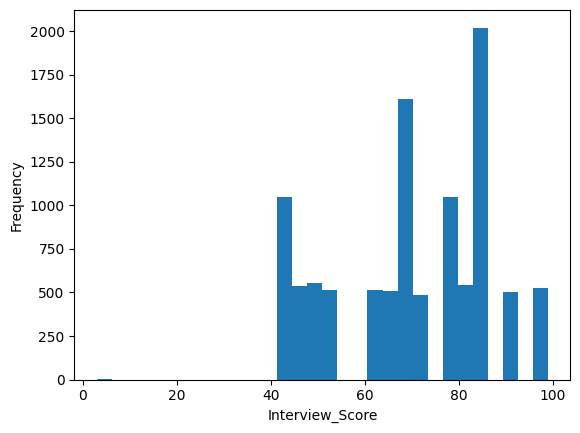

In [58]:
# Q19: Visualize the distribution of 'Interview_Score'. (Histogram Plot)
plt.hist(df['Interview_Score'], bins = 30)
plt.xlabel('Interview_Score')
plt.ylabel('Frequency')

Text(0, 0.5, 'Salary_Expectation')

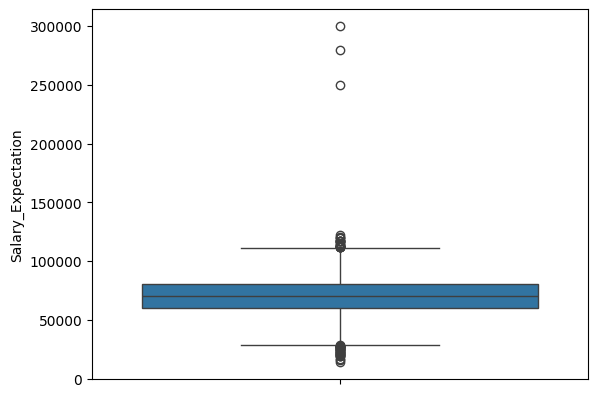

In [60]:
# Q20: Plot a box plot to identify extreme values in 'Salary_Expectation'.
sns.boxplot(df['Salary_Expectation'])
plt.ylabel('Salary_Expectation')

# **Section 3: Analysis Using np.where() Function**

In [61]:
# Q21: Create a new column 'High_Salary' where the value is 'Yes'
# if the 'Salary_Expectation' is above 100,000, otherwise 'No'.

df['High_Salary'] = np.where(df['Salary_Expectation'] > 100000, 'Yes', 'No')
df['High_Salary'].value_counts()

,count
High_Salary,
No,10754
Yes,246


In [64]:
# Q22: Create a column 'Experienced' with value 'Yes'
# if 'Experience_Level' is 'Senior', otherwise 'No'.
df['Experienced_column'] = np.where(df['Experience_Level'] == 0, "Fresher",
                                    np.where(df['Experience_Level'] < 5, "Senior", "Super-Senior"))
df['Experienced_column'].value_counts()

,count
Experienced_column,
Super-Senior,5524
Senior,4147
Fresher,1329


In [65]:
df['Experienced'] = np.where(df['Experienced_column'] == 'Senior', 'Yes', 'No')
df['Experienced'].value_counts()

,count
Experienced,
No,6853
Yes,4147


In [66]:
# Q23: Create a column 'Good_Score' where the value is 'Yes'
# if 'Interview_Score' is above 80, otherwise 'No'.
df['Good_Score'] = np.where(df['Interview_Score'] > 80, 'Yes', 'No')
df['Good_Score'].value_counts()

,count
Good_Score,
No,7411
Yes,3589


In [67]:
# Q24: Create a column 'Certified' where the value is 'Yes'
#if 'Certifications_Count' is 2 or more, otherwise 'No'.
df['Certified'] = np.where(df['Certifications_Count'] >= 2, 'Yes', 'No')
df['Certified'].value_counts()

,count
Certified,
Yes,6299
No,4701


In [68]:
# Q25: Create a column 'Technical_Background' where the value is
#'Yes' if 'Educational_Background' is 'Computer Science' or 'Information Technology'.
#Otherwise, 'No'. # HINT use  - isin
df['Technical_Background'] = np.where(df['Educational_Background'].isin(
    ['Computer Science', 'Information Technology']), 'Yes', 'No')
df['Technical_Background'].value_counts()

,count
Technical_Background,
No,9455
Yes,1545


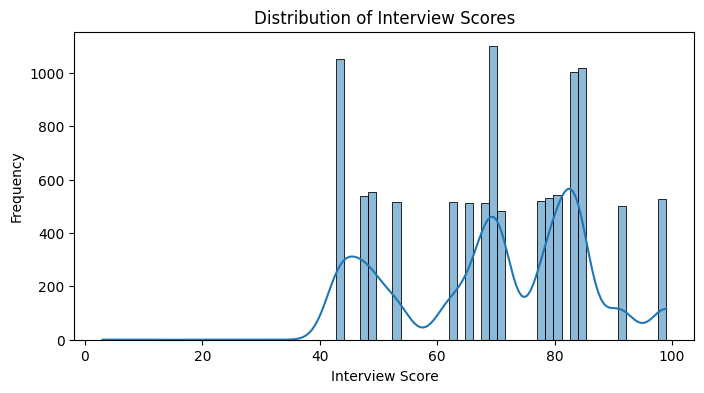

In [72]:
plt.figure(figsize=(8, 4))
sns.histplot(df['Interview_Score'], bins=70, kde=True)
plt.title('Distribution of Interview Scores')
plt.xlabel('Interview Score')
plt.ylabel('Frequency')
plt.show()

In [70]:
df['Techanical_Background']=np.where(
    df['Educational_Background']=="Computer Science","Yes" or "Information Technology","No")